In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cancer=pd.read_csv('cancer.csv')
cancer.head()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
cancer.tail()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


Here 2 means not cancer pateint and 4 represents cancer patient

In [5]:
cancer['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   thickness        699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epith_cell_size  699 non-null    int64 
 6   nuclei           699 non-null    object
 7   chromatin        699 non-null    int64 
 8   nucleoli         699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
cancer.isnull().sum()

id                 0
thickness          0
cell_size          0
cell_shape         0
adhesion           0
epith_cell_size    0
nuclei             0
chromatin          0
nucleoli           0
mitoses            0
class              0
dtype: int64

In [11]:
#droping the unnessecary column
cancer = cancer.drop('id', axis=1)

In [13]:
cancer.head()

,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [14]:
cancer.describe()

,thickness,cell_size,cell_shape,adhesion,epith_cell_size,chromatin,nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [15]:
len(cancer)

699

In [16]:
len(cancer.columns)

10

<Axes: xlabel='class', ylabel='Count'>

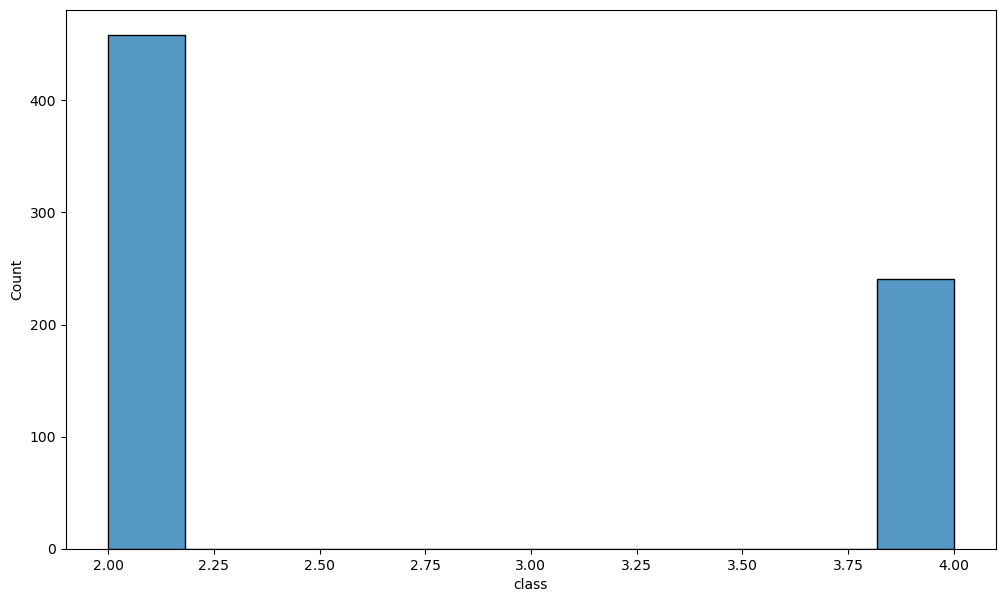

In [17]:
plt.figure(figsize=(12,7))
sns.histplot(cancer, x='class')

<Axes: xlabel='thickness', ylabel='Count'>

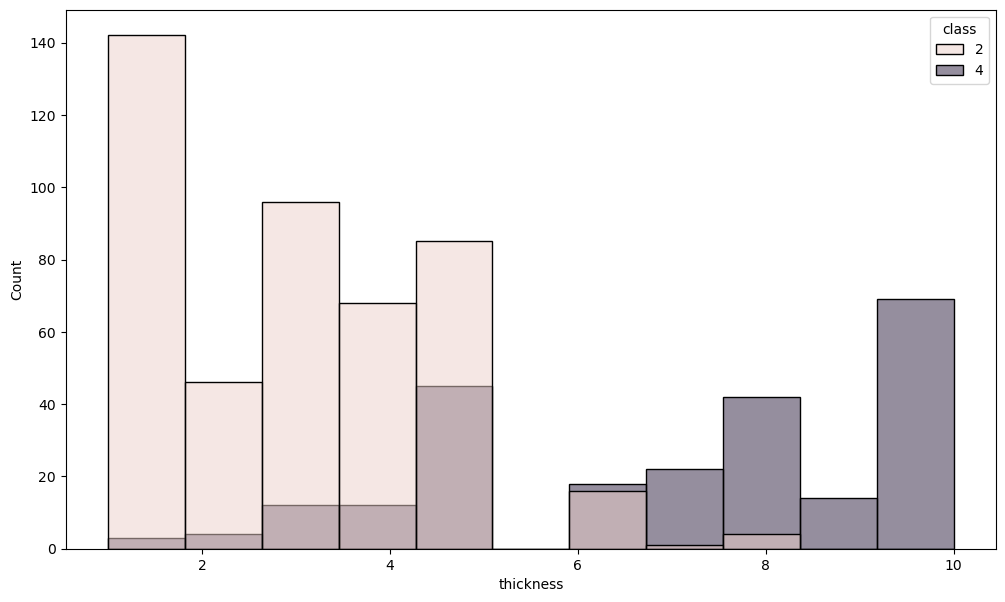

In [18]:
plt.figure(figsize=(12,7))
sns.histplot(cancer, x='thickness', hue='class')

<Axes: xlabel='cell_size', ylabel='Count'>

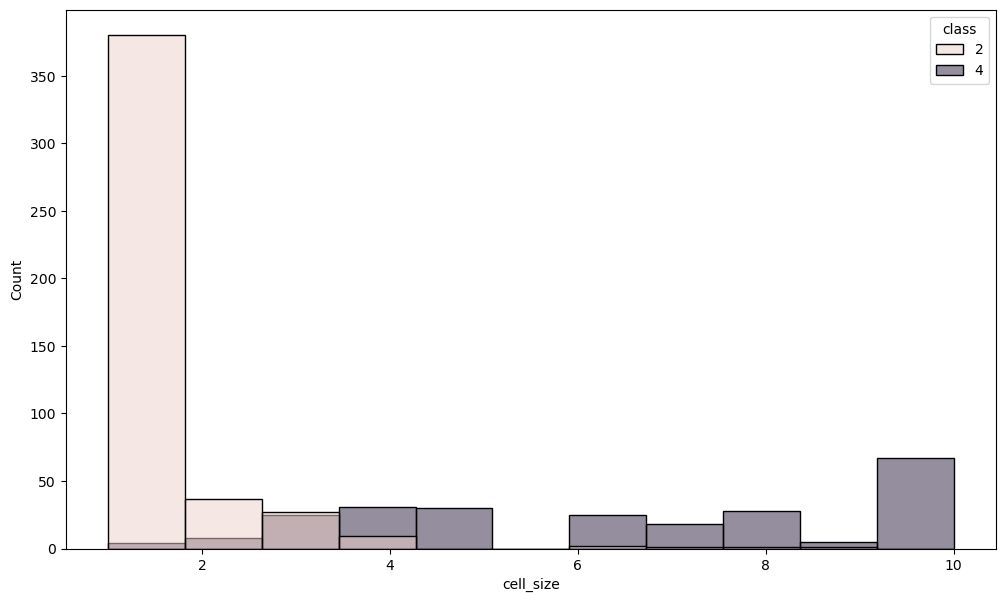

In [19]:
plt.figure(figsize=(12,7))
sns.histplot(cancer, x='cell_size', hue='class')

<Axes: xlabel='cell_shape', ylabel='Count'>

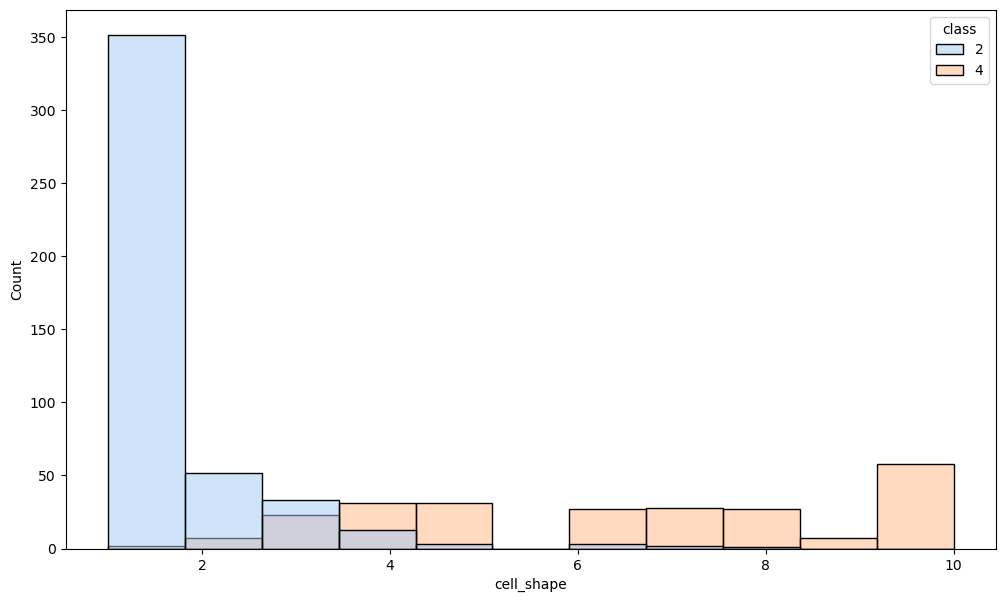

In [20]:
plt.figure(figsize=(12,7))
sns.histplot(cancer, x='cell_shape', hue='class', palette='pastel')

In [21]:
correlation = cancer.corr()
correlation['class']

C:\Users\Home store\AppData\Local\Temp\ipykernel_13792\2240260999.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cancer.corr()


thickness          0.716001
cell_size          0.817904
cell_shape         0.818934
adhesion           0.696800
epith_cell_size    0.682785
chromatin          0.756616
nucleoli           0.712244
mitoses            0.423170
class              1.000000
Name: class, dtype: float64

<Axes: >

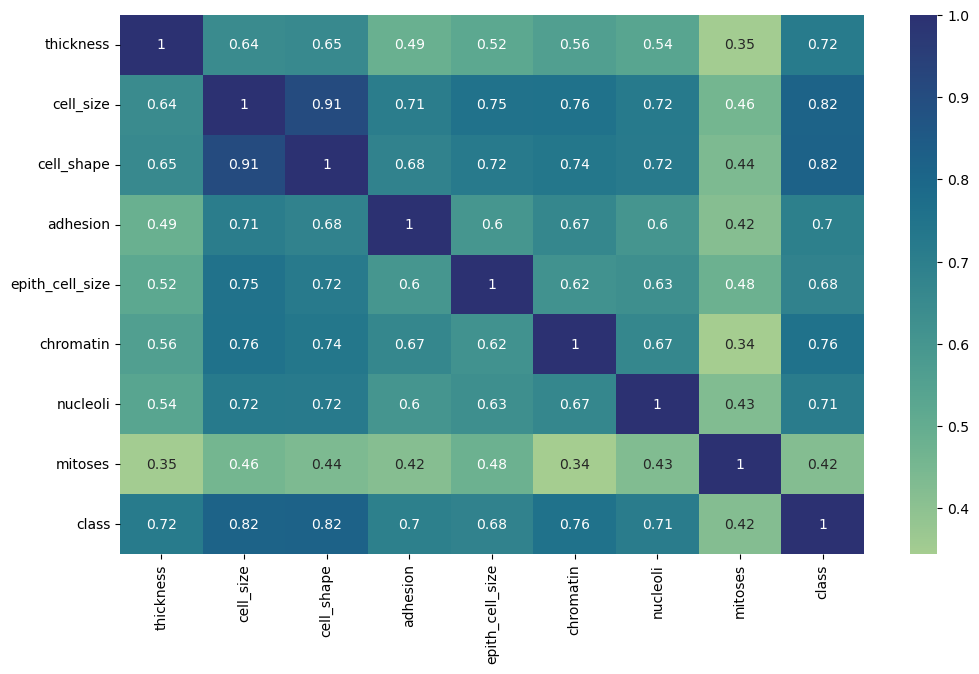

In [22]:
plt.figure(figsize=(12,7))
sns.heatmap(correlation, annot=True, cmap='crest')

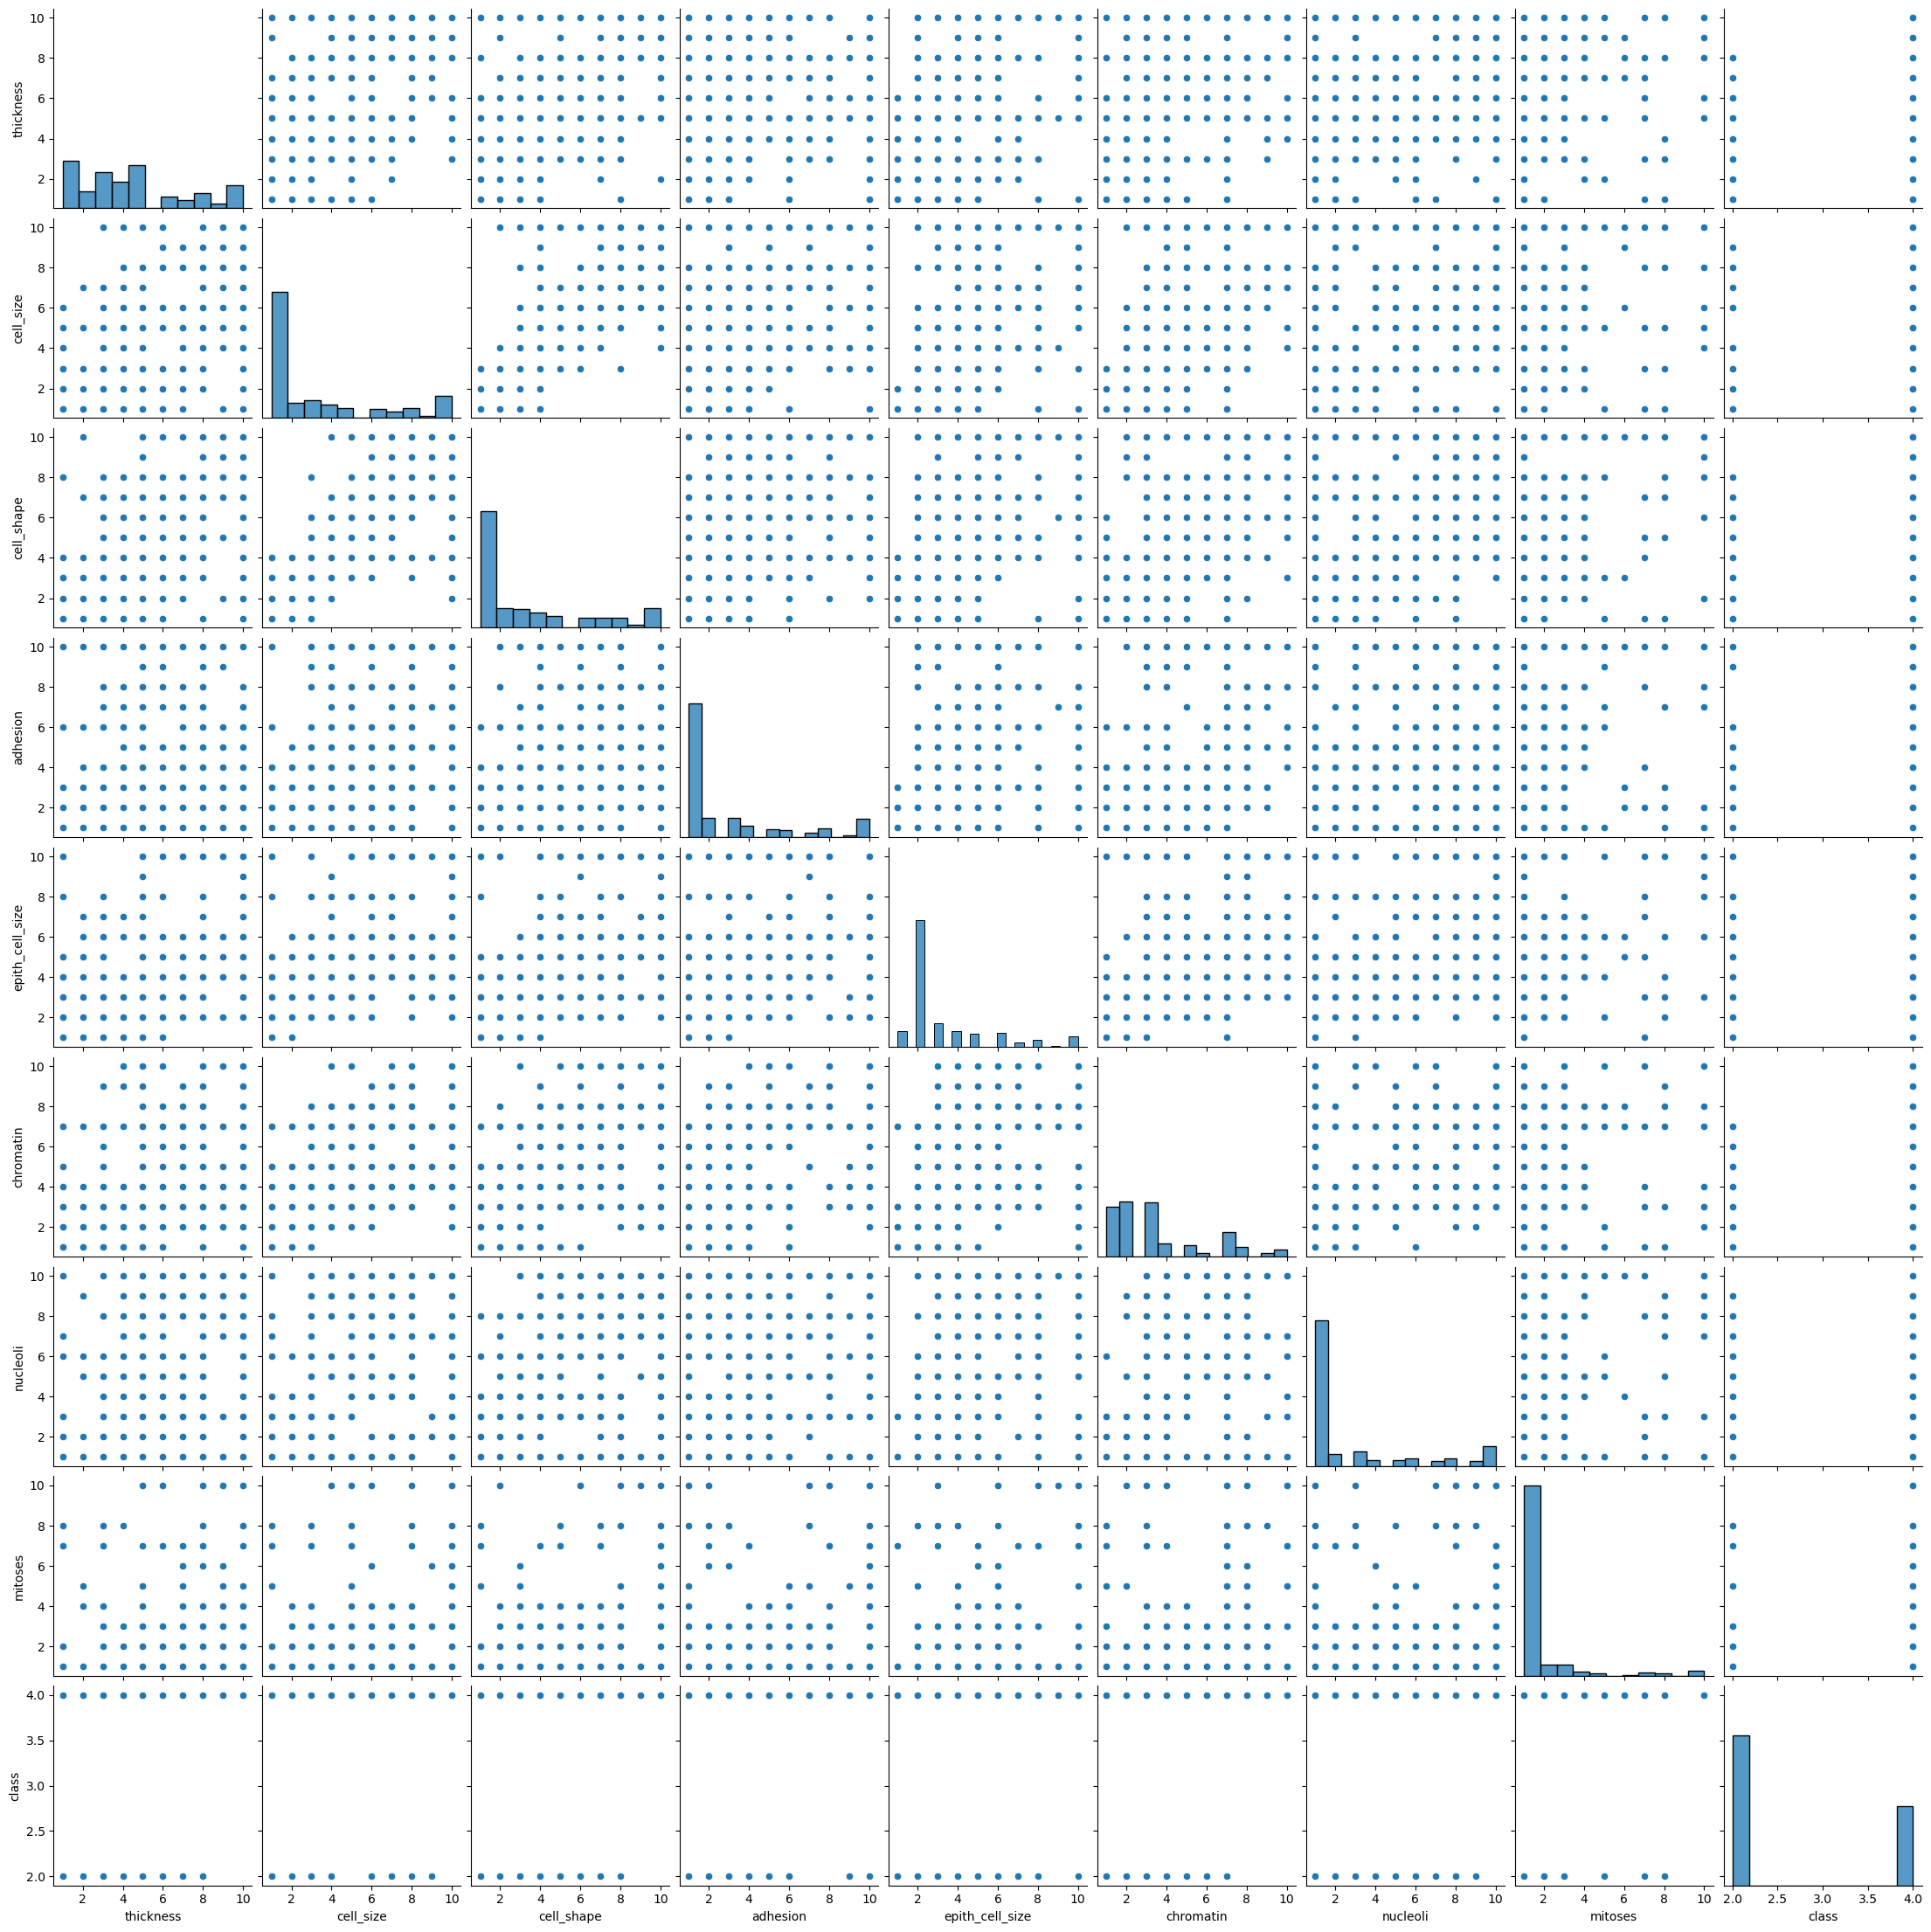

In [24]:
sns.pairplot(cancer)

In [25]:
from sklearn.model_selection import train_test_split

cancer_train, cancer_test = train_test_split(cancer, test_size=0.1, random_state=20)

In [27]:
training_input_data=cancer_train.drop('class',axis=1)
training_label=cancer_train['class']
test_input_data=cancer_test.drop('class', axis=1)
test_label=cancer_test['class']

In [28]:
# SInce there are no missing values or categorical features to be encoded, we 
# will only perform scaling.
# Design a pipeline for performing Min-Max Scaling

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

In [29]:
# Obtaining "training_input_data_preprocessed" by applying the pipeline to 
# "training_input_data"
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values='?', strategy='most_frequent')
training_input_data_preprocessed = imputer.fit_transform(training_input_data)

In [31]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model

LogisticRegression()

In [32]:
log_model.fit(training_input_data_preprocessed,training_label)

LogisticRegression()

In [33]:
# Evaluating the score of the trained model
log_model.score(training_input_data_preprocessed,training_label)

0.9682034976152624

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Using cross validation to create log_scores for 10 subsets

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, training_input_data_preprocessed, training_label ,
                        scoring='neg_mean_squared_error', cv=10)
scores

array([-0.12698413, -0.25396825, -0.12698413, -0.12698413, -0.06349206,
       -0.19047619, -0.12698413, -0.19047619, -0.12698413, -0.19354839])

In [36]:
RMSE_scores = np.sqrt(-scores)
RMSE_scores

array([0.35634832, 0.50395263, 0.35634832, 0.35634832, 0.25197632,
       0.43643578, 0.35634832, 0.43643578, 0.35634832, 0.43994135])

In [37]:
# Predicting the labels (output_labels_pred) for training_input_data_preprocessed using corss validation prediction
# and keep the number of folds 10

from sklearn.model_selection import cross_val_predict
training_labels_pred = cross_val_predict(log_model, training_input_data_preprocessed,
                                       training_label, cv=10)

training_labels_pred

array([2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2,

In [38]:
# Determining the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(training_label, training_labels_pred)

array([[410,  12],
       [ 12, 195]], dtype=int64)

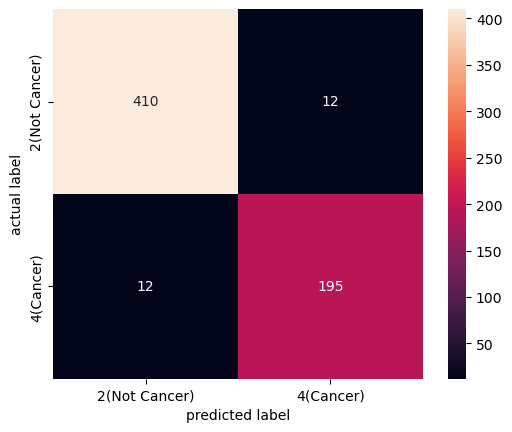

In [39]:
cm = confusion_matrix(training_label, training_labels_pred)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['2(Not Cancer)', '4(Cancer)'],
                        yticklabels=['2(Not Cancer)', '4(Cancer)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [40]:
#accuracy of model
from sklearn.metrics import accuracy_score

accuracy_score(training_label, training_labels_pred)

0.9618441971383148

In [41]:
#determining precision,recall and f1 score
from sklearn.metrics import classification_report

print(classification_report(training_label, training_labels_pred))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       422
           4       0.94      0.94      0.94       207

    accuracy                           0.96       629
   macro avg       0.96      0.96      0.96       629
weighted avg       0.96      0.96      0.96       629

